<a href="https://colab.research.google.com/github/BMKEITA/adversarial_firewall/blob/main/extendadversarialfirewallCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

100%|██████████| 170M/170M [00:02<00:00, 80.7MB/s]


Epoch 1 - Train: 52.80%, Val: 52.17%, Loss: 1.5389
Epoch 2 - Train: 62.83%, Val: 61.82%, Loss: 1.1657
Epoch 3 - Train: 67.39%, Val: 65.17%, Loss: 1.0255
Epoch 4 - Train: 69.68%, Val: 65.85%, Loss: 0.9309
Epoch 5 - Train: 71.95%, Val: 67.23%, Loss: 0.8571
Epoch 6 - Train: 74.37%, Val: 68.65%, Loss: 0.7982
Epoch 7 - Train: 76.48%, Val: 69.61%, Loss: 0.7412
Epoch 8 - Train: 78.81%, Val: 69.76%, Loss: 0.6919
Epoch 9 - Train: 79.45%, Val: 68.97%, Loss: 0.6435
Epoch 10 - Train: 81.32%, Val: 70.23%, Loss: 0.5944
Epoch 11 - Train: 82.77%, Val: 70.21%, Loss: 0.5476
Epoch 12 - Train: 85.84%, Val: 71.34%, Loss: 0.4997
Epoch 13 - Train: 85.47%, Val: 70.60%, Loss: 0.4525
Epoch 14 - Train: 89.25%, Val: 71.61%, Loss: 0.4166
Epoch 15 - Train: 90.72%, Val: 70.81%, Loss: 0.3701
Epoch 16 - Train: 90.86%, Val: 70.14%, Loss: 0.3364
Epoch 17 - Train: 92.80%, Val: 71.26%, Loss: 0.2969
Epoch 18 - Train: 93.47%, Val: 70.52%, Loss: 0.2637
Epoch 19 - Train: 93.21%, Val: 69.38%, Loss: 0.2283
Epoch 20 - Train: 94.

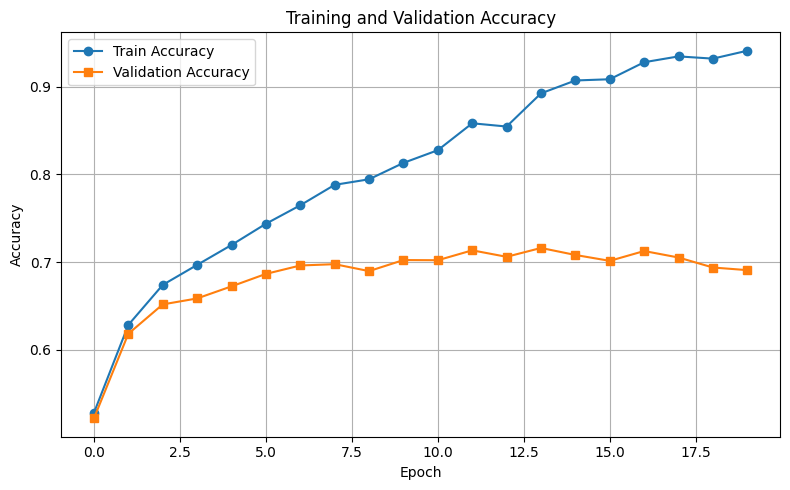

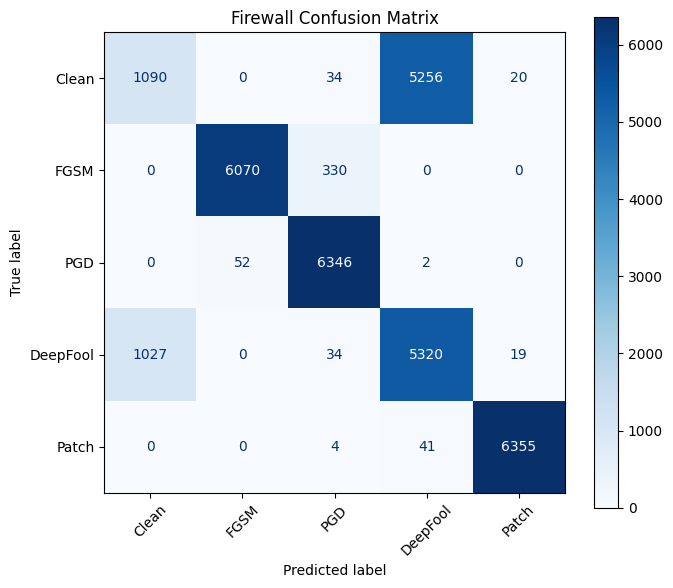

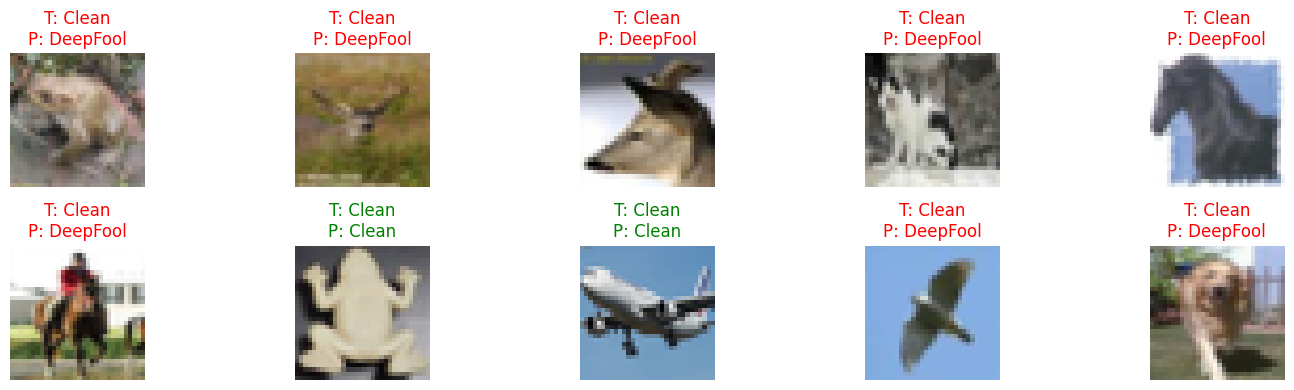

              precision    recall  f1-score   support

       Clean       0.51      0.17      0.26      6400
        FGSM       0.99      0.95      0.97      6400
         PGD       0.94      0.99      0.97      6400
    DeepFool       0.50      0.83      0.63      6400
       Patch       0.99      0.99      0.99      6400

    accuracy                           0.79     32000
   macro avg       0.79      0.79      0.76     32000
weighted avg       0.79      0.79      0.76     32000

CSV log saved to: /content/drive/MyDrive/adversarial_firewall/firewall_predictions.csv


In [1]:
# ✅ Full Colab-ready CIFAR-10 Adversarial Firewall Code with DeepFool, C&W, and Patch

!pip install -q torchattacks scikit-learn pandas matplotlib

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms as T
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from torchattacks import FGSM, PGD, DeepFool, CW

# === Setup ===
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# === Dataset ===
transform = T.ToTensor()
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

# === Models ===
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

class FirewallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

base_model = SimpleCNN().to(device)
firewall = FirewallNet().to(device)

# === Utils ===
def evaluate_accuracy(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    return correct / total

def plot_training_accuracy_curve(train_accs, val_accs, save_path=None):
    plt.figure(figsize=(8, 5))
    plt.plot(train_accs, label='Train Accuracy', marker='o')
    plt.plot(val_accs, label='Validation Accuracy', marker='s')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

# === Base Model Training ===
train_accs, val_accs = [], []
def train_base_model(model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(20):
        model.train()
        total_loss = 0
        for x, y in trainloader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            loss = F.cross_entropy(model(x), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_acc = evaluate_accuracy(model, trainloader)
        val_acc = evaluate_accuracy(model, testloader)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        print(f"Epoch {epoch+1} - Train: {train_acc:.2%}, Val: {val_acc:.2%}, Loss: {total_loss/len(trainloader):.4f}")

train_base_model(base_model)

# === Patch Attack ===
def add_patch(images, patch_size=8, position=(24, 24), intensity=1.0):
    patched = images.clone()
    x, y = position
    patched[:, :, x:x+patch_size, y:y+patch_size] = intensity
    return patched

# === Firewall Dataset Creation ===
def create_firewall_dataset(model, dataloader, batches=50):
    model.eval()
    attacks = [
        (FGSM(model, eps=0.1), 1),
        (PGD(model, eps=0.1, alpha=2/255, steps=10), 2),
        (DeepFool(model, steps=50), 3),
    ]
    firewall_data = []
    for i, (images, labels) in enumerate(dataloader):
        if i >= batches: break
        images, labels = images.to(device), labels.to(device)
        firewall_data.append((images.clone(), torch.zeros(len(images), dtype=torch.long)))
        for attack, idx in attacks:
            firewall_data.append((attack(images, labels).detach(), torch.full((len(images),), idx)))
        firewall_data.append((add_patch(images), torch.full((len(images),), 4)))
    X = torch.cat([x[0].cpu() for x in firewall_data])
    y = torch.cat([x[1] for x in firewall_data])
    return X, y

X_fw, y_fw = create_firewall_dataset(base_model, trainloader)

# === Firewall Training ===
def train_firewall_model(model, X, y):
    model.train()
    loader = DataLoader(TensorDataset(X, y), batch_size=256, shuffle=True)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(5):
        total_loss = 0
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = F.cross_entropy(model(xb), yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"[Firewall] Epoch {epoch+1} - Loss: {total_loss/len(loader):.4f}")

train_firewall_model(firewall, X_fw, y_fw)

# === Evaluation ===
def evaluate_firewall(model, X, y, class_names, output_dir):
    model.eval()
    loader = DataLoader(TensorDataset(X, y), batch_size=256)
    all_preds, all_labels, all_images = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            preds = model(xb.to(device)).argmax(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(yb.numpy())
            all_images.extend(xb.cpu())

    plot_confusion_matrix(all_labels, all_preds, class_names, f"{output_dir}/conf_matrix.png")
    visualize_sample_predictions(all_images, all_labels, all_preds, class_names, 10, f"{output_dir}/sample_preds.png")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    export_prediction_log(all_labels, all_preds, class_names, f"{output_dir}/firewall_predictions.csv")

def plot_confusion_matrix(y_true, y_pred, class_names, save_path):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(7, 6))
    disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, values_format='d')
    plt.title("Firewall Confusion Matrix")
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

def visualize_sample_predictions(images, y_true, y_pred, class_names, n, save_path):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        ax = plt.subplot(2, n//2, i + 1)
        img = images[i].permute(1, 2, 0).numpy()
        ax.imshow(img)
        color = "green" if y_true[i] == y_pred[i] else "red"
        ax.set_title(f"T: {class_names[y_true[i]]}\nP: {class_names[y_pred[i]]}", color=color)
        ax.axis("off")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

def export_prediction_log(y_true, y_pred, class_names, path):
    df = pd.DataFrame({
        "TrueLabel": [class_names[i] for i in y_true],
        "Predicted": [class_names[i] for i in y_pred]
    })
    df.to_csv(path, index=False)
    print(f"CSV log saved to: {path}")

# === Run Evaluation ===
base_path = "/content/drive/MyDrive/adversarial_firewall"
os.makedirs(base_path, exist_ok=True)
torch.save(base_model.state_dict(), f"{base_path}/base_model.pth")
torch.save(firewall.state_dict(), f"{base_path}/firewall_model.pth")
pd.DataFrame({"Train": train_accs, "Val": val_accs}).to_csv(f"{base_path}/train_history.csv", index=False)
plot_training_accuracy_curve(train_accs, val_accs, save_path=f"{base_path}/accuracy_curve.png")

class_names = ["Clean", "FGSM", "PGD", "DeepFool", "Patch"]
evaluate_firewall(firewall, X_fw, y_fw, class_names, base_path)
